<a href="https://colab.research.google.com/github/duncanodhis/Richter-s-Predictor-Modeling-Earthquake-Damage/blob/main/Richter's_Predictor_Modeling_Earthquake_Damage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Importing modules for data preprocessing and manipulation
import numpy as np
import pandas as pd

# Importing modules for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing modules for data splitting and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing preprocessing modules
from sklearn.preprocessing import StandardScaler , OneHotEncoder

In [ ]:
train_labels = pd.read_csv("train_labels.csv")
train_values = pd.read_csv("train_values.csv")

In [ ]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.merge(train_values, train_labels ,on= 'building_id')

In [ ]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [ ]:
df.set_index(keys=['building_id'], inplace = True)

In [ ]:
df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

In [ ]:
CATEGORICAL = [col for col in df.columns if df[col].dtypes == 'object']

In [ ]:
CATEGORICAL

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [ ]:
df[CATEGORICAL].head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
building_id,,,,,,,,
802906,t,r,n,f,q,t,d,v
28830,o,r,n,x,q,s,d,v
94947,t,r,n,f,x,t,d,v
590882,t,r,n,f,x,s,d,v
201944,t,r,n,f,x,s,d,v


In [ ]:
NUMERICAL = [col for col in df.columns if df[col].dtypes == 'int64']

In [ ]:
df[NUMERICAL].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   geo_level_1_id                          260601 non-null  int64
 1   geo_level_2_id                          260601 non-null  int64
 2   geo_level_3_id                          260601 non-null  int64
 3   count_floors_pre_eq                     260601 non-null  int64
 4   age                                     260601 non-null  int64
 5   area_percentage                         260601 non-null  int64
 6   height_percentage                       260601 non-null  int64
 7   has_superstructure_adobe_mud            260601 non-null  int64
 8   has_superstructure_mud_mortar_stone     260601 non-null  int64
 9   has_superstructure_stone_flag           260601 non-null  int64
 10  has_superstructure_cement_mortar_stone  260601 non-null  int64


In [ ]:
for col in df.columns:
  print(col + ": " , df[col].isnull().sum())

geo_level_1_id:  0
geo_level_2_id:  0
geo_level_3_id:  0
count_floors_pre_eq:  0
age:  0
area_percentage:  0
height_percentage:  0
land_surface_condition:  0
foundation_type:  0
roof_type:  0
ground_floor_type:  0
other_floor_type:  0
position:  0
plan_configuration:  0
has_superstructure_adobe_mud:  0
has_superstructure_mud_mortar_stone:  0
has_superstructure_stone_flag:  0
has_superstructure_cement_mortar_stone:  0
has_superstructure_mud_mortar_brick:  0
has_superstructure_cement_mortar_brick:  0
has_superstructure_timber:  0
has_superstructure_bamboo:  0
has_superstructure_rc_non_engineered:  0
has_superstructure_rc_engineered:  0
has_superstructure_other:  0
legal_ownership_status:  0
count_families:  0
has_secondary_use:  0
has_secondary_use_agriculture:  0
has_secondary_use_hotel:  0
has_secondary_use_rental:  0
has_secondary_use_institution:  0
has_secondary_use_school:  0
has_secondary_use_industry:  0
has_secondary_use_health_post:  0
has_secondary_use_gov_office:  0
has_secon

In [ ]:
for col in CATEGORICAL:
  print(col + ": " , df[col].value_counts())

land_surface_condition:  t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64
foundation_type:  r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64
roof_type:  n    182842
q     61576
x     16183
Name: roof_type, dtype: int64
ground_floor_type:  f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64
other_floor_type:  q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64
position:  s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64
plan_configuration:  d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64
legal_ownership_status:  v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64


In [ ]:
df[NUMERICAL].columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade'],
      dtype='object')

In [ ]:
categorical_cols=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']

numerical_cols =['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'damage_grade']

# Applying get_dummies to categorical columns
categorical_dummies = pd.get_dummies(df[categorical_cols])

# Dropping original categorical columns from df
df = df.drop(columns=categorical_cols)

# Concatenating original df with dummy columns
df = pd.concat([df, categorical_dummies], axis=1)


In [ ]:
df.head(5)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


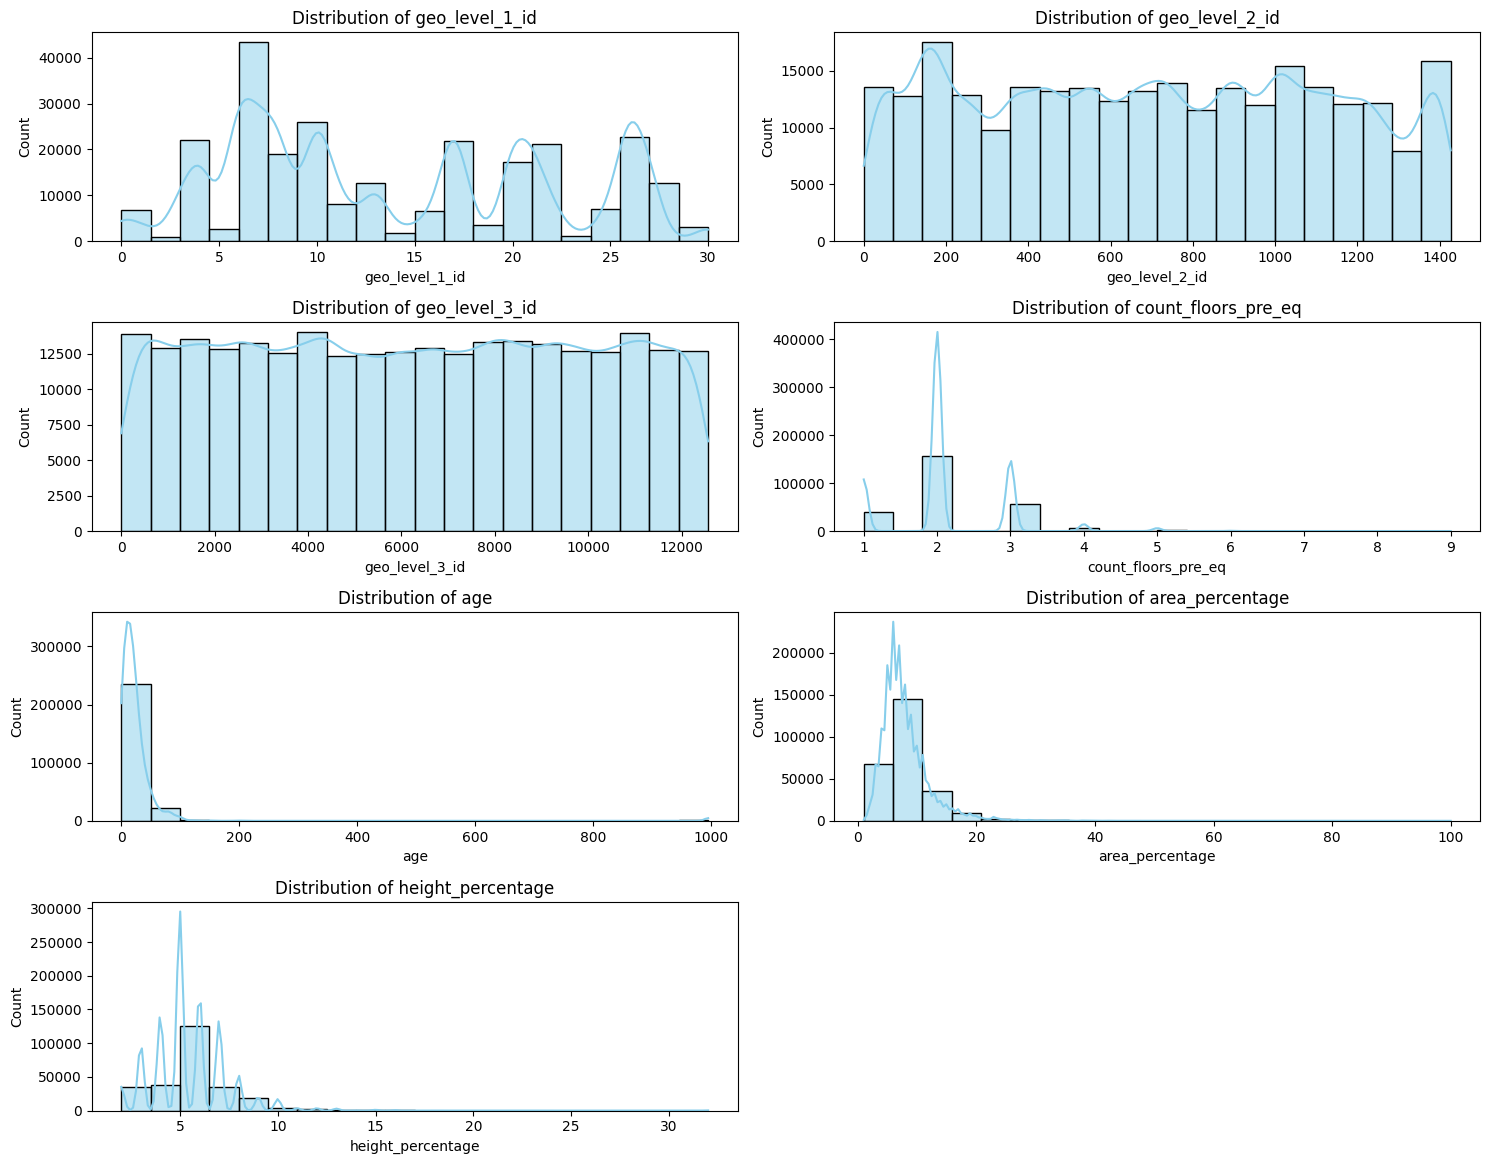

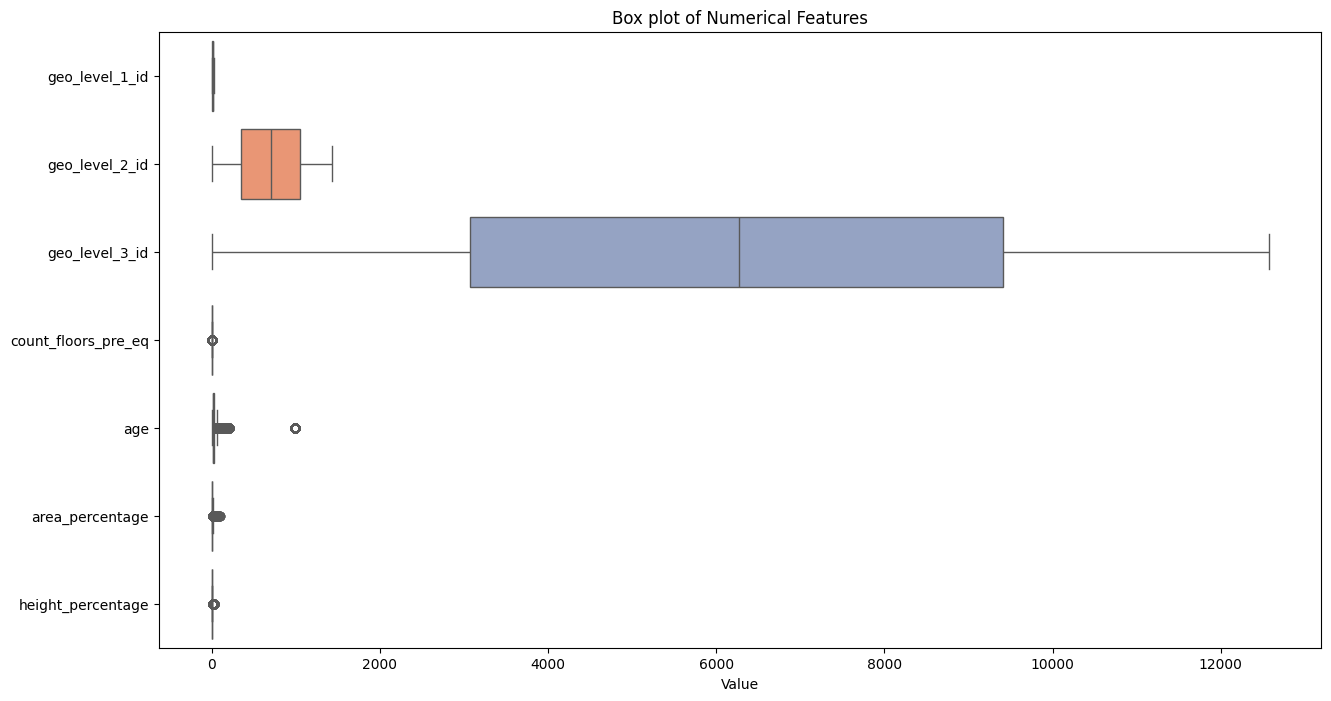

<ipython-input-19-8b70039ca336>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_variable, palette="Set1")


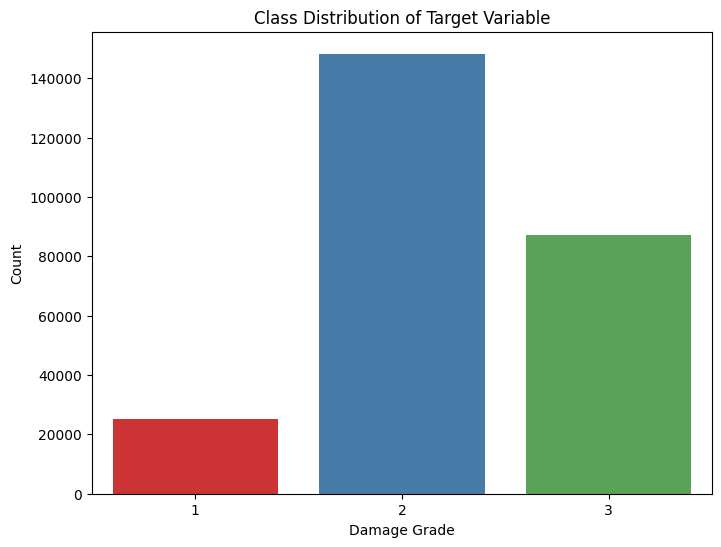

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable
target_variable = 'damage_grade'

# Univariate Analysis: Numerical Features

# Distribution of numerical features using histograms
numerical_features = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
                      'count_floors_pre_eq', 'age', 'area_percentage',
                      'height_percentage']
num_rows = len(numerical_features)
num_cols = 2
plt.figure(figsize=(15, 20))

for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_features], orient="h", palette="Set2")
plt.title("Box plot of Numerical Features")
plt.xlabel("Value")
plt.show()

# Checking class balance in the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=target_variable, palette="Set1")
plt.title("Class Distribution of Target Variable")
plt.xlabel("Damage Grade")
plt.ylabel("Count")
plt.show()


Bivariate analysis

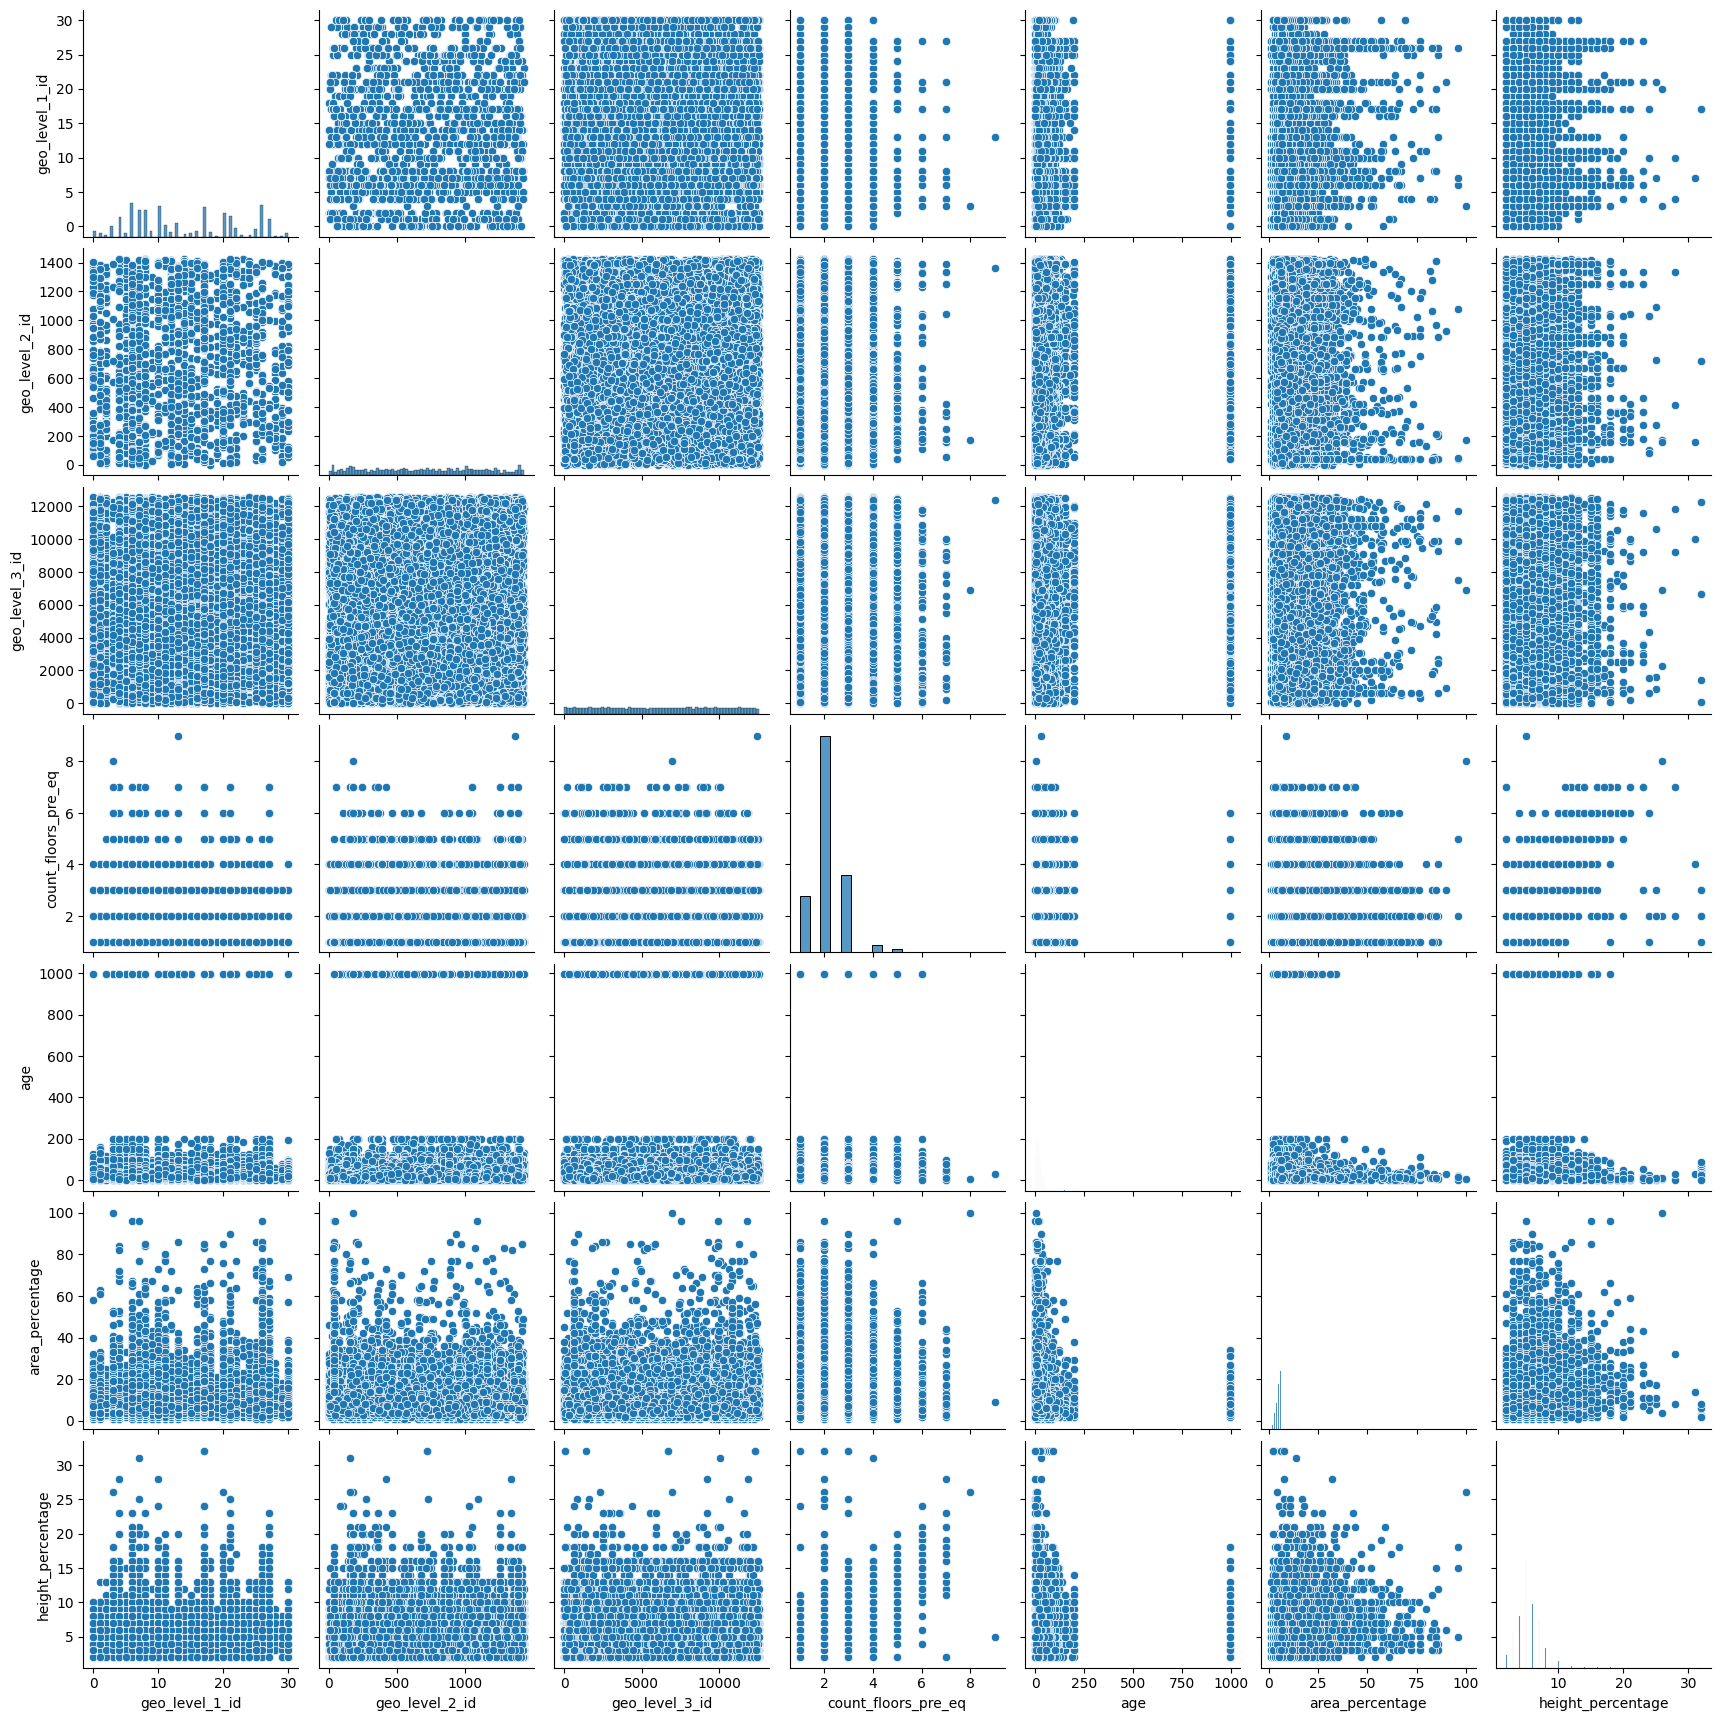

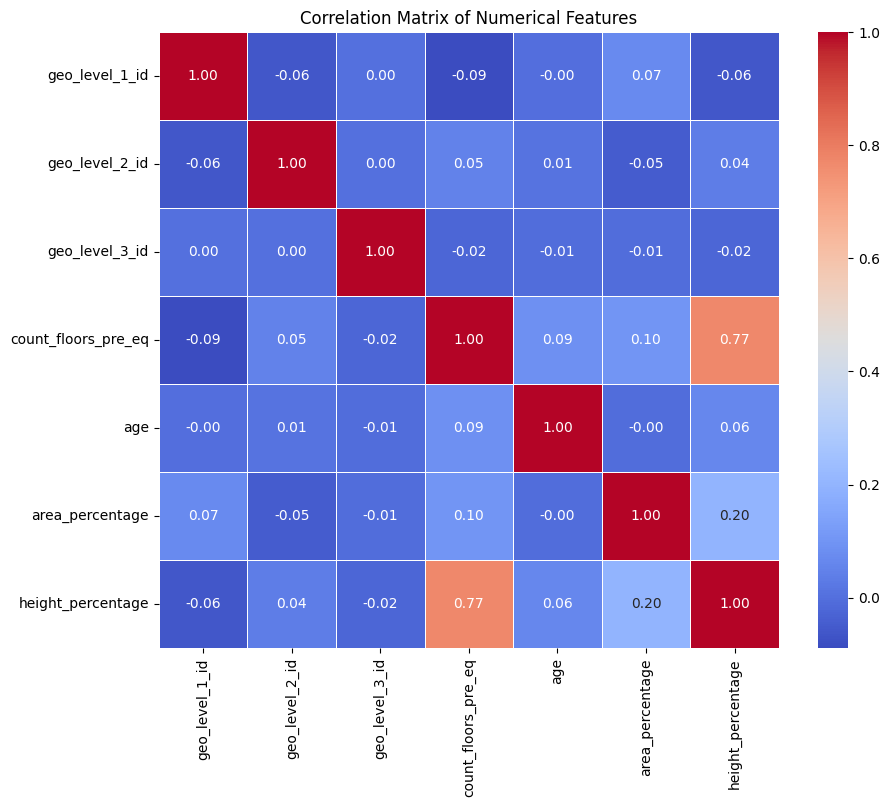

In [ ]:
# Scatter plot matrix
sns.pairplot(df[numerical_features])
plt.show()

# Correlation matrix
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


<ipython-input-21-f089d372b6ff>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_variable, y=feature, palette="Set2")
<ipython-input-21-f089d372b6ff>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_variable, y=feature, palette="Set2")
<ipython-input-21-f089d372b6ff>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_variable, y=feature, palette="Set2")
<ipython-input-21-f089d372b6ff>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

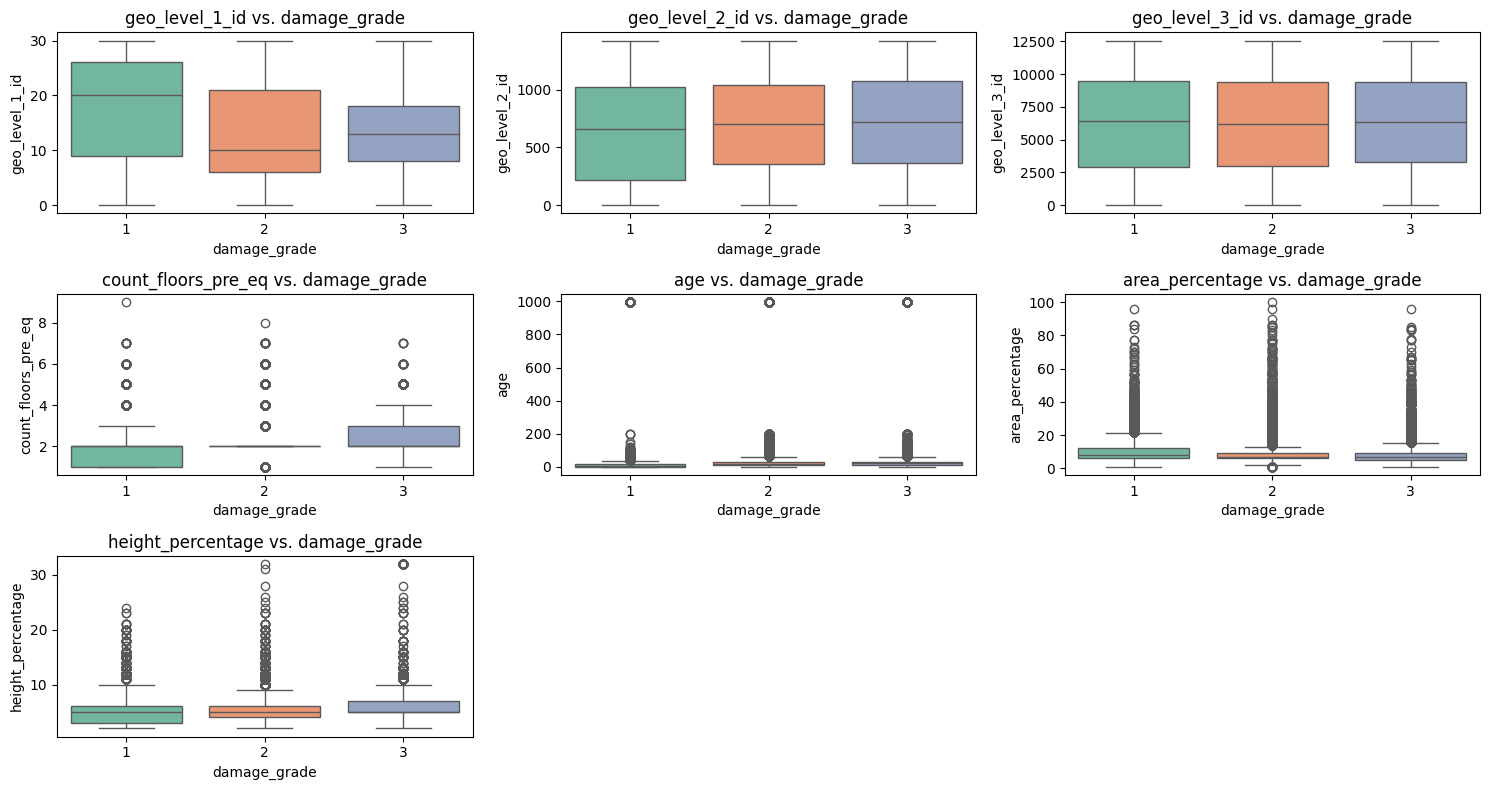

In [ ]:
# Box plots of numerical features vs. target variable
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=target_variable, y=feature, palette="Set2")
    plt.title(f"{feature} vs. {target_variable}")
    plt.xlabel(target_variable)
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


In [ ]:
# Importing chi-square test function
from scipy.stats import chi2_contingency

# Calculate chi-square test for association between foundation type and damage grade
crosstab = pd.crosstab(df['foundation_type_r'], df[target_variable])
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")


Chi-square value: 40230.628329021
P-value: 0.0


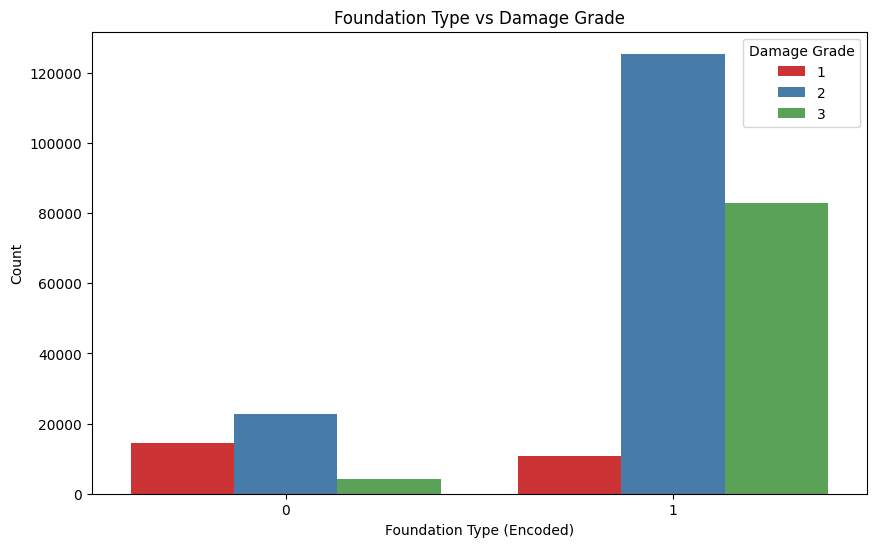

Chi-square value: 40230.628329021
P-value: 0.0


In [ ]:
# Stacked bar plot for relationship between foundation type and damage grade
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='foundation_type_r', hue=target_variable, palette="Set1")
plt.title("Foundation Type vs Damage Grade")
plt.xlabel("Foundation Type (Encoded)")
plt.ylabel("Count")
plt.legend(title='Damage Grade')
plt.show()

# Calculate chi-square test for association between foundation type and damage grade
crosstab = pd.crosstab(df['foundation_type_r'], df[target_variable])
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")


In [ ]:
from scipy.stats import pearsonr, f_oneway

# Retrieve numerical values
numerical_columns = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
                     'count_floors_pre_eq', 'age', 'area_percentage',
                     'height_percentage', 'count_families']

# Pairwise relationships between numerical features
for i, feature1 in enumerate(numerical_columns):
    for j, feature2 in enumerate(numerical_columns):
        if i < j:  # Avoid redundancy
            correlation_coefficient, p_value = pearsonr(df[feature1], df[feature2])
            print(f"Correlation between {feature1} and {feature2}: {correlation_coefficient:.2f} (p-value: {p_value:.4f})")

# Relationships between numerical features and the target variable
for feature in numerical_columns:
    if feature != 'damage_grade':
        # ANOVA test
        f_statistic, p_value = f_oneway(df[df['damage_grade'] == 1][feature],
                                         df[df['damage_grade'] == 2][feature],
                                         df[df['damage_grade'] == 3][feature])
        print(f"ANOVA test for {feature}: F-statistic = {f_statistic:.2f}, p-value = {p_value:.4f}")


Correlation between geo_level_1_id and geo_level_2_id: -0.06 (p-value: 0.0000)
Correlation between geo_level_1_id and geo_level_3_id: 0.00 (p-value: 0.1652)
Correlation between geo_level_1_id and count_floors_pre_eq: -0.09 (p-value: 0.0000)
Correlation between geo_level_1_id and age: -0.00 (p-value: 0.0461)
Correlation between geo_level_1_id and area_percentage: 0.07 (p-value: 0.0000)
Correlation between geo_level_1_id and height_percentage: -0.06 (p-value: 0.0000)
Correlation between geo_level_1_id and count_families: 0.04 (p-value: 0.0000)
Correlation between geo_level_2_id and geo_level_3_id: 0.00 (p-value: 0.6382)
Correlation between geo_level_2_id and count_floors_pre_eq: 0.05 (p-value: 0.0000)
Correlation between geo_level_2_id and age: 0.01 (p-value: 0.0000)
Correlation between geo_level_2_id and area_percentage: -0.05 (p-value: 0.0000)
Correlation between geo_level_2_id and height_percentage: 0.04 (p-value: 0.0000)
Correlation between geo_level_2_id and count_families: -0.01 (p

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
from sklearn.decomposition import PCA

# List of all numerical columns including encoded categorical features
all_numerical_columns = df_filled.columns[df_filled.dtypes != 'object']

# List to store columns that pass both tests
significant_columns = []

# Pairwise relationships between all numerical features
for i, feature1 in enumerate(all_numerical_columns):
    for j, feature2 in enumerate(all_numerical_columns):
        if i < j:  # Avoid redundancy
            correlation_coefficient, p_value = pearsonr(df_filled[feature1], df_filled[feature2])
            if p_value < 0.05:
                # Check if the column pair already exists in the list
                if (feature1, feature2) not in significant_columns and (feature2, feature1) not in significant_columns:
                    significant_columns.append((feature1, feature2))

# Relationships between all numerical features and the target variable
for feature in all_numerical_columns:
    if feature != 'damage_grade':
        f_statistic, p_value = f_oneway(df_filled[df_filled['damage_grade'] == 1][feature],
                                         df_filled[df_filled['damage_grade'] == 2][feature],
                                         df_filled[df_filled['damage_grade'] == 3][feature])
        if p_value < 0.05:
            # Check if the column pair already exists in the list
            if (feature, 'damage_grade') not in significant_columns:
                significant_columns.append((feature, 'damage_grade'))

# Create a list of unique significant columns including 'damage_grade'
significant_columns_unique = list(set(column for pair in significant_columns for column in pair))
significant_columns_unique.append('damage_grade')

# Create a new DataFrame with only the significant columns
df_significant = df_filled[significant_columns_unique]

df_significant.head()

In [ ]:
# Impute NaN values with the mean of the column
df_filled = df.fillna(df.mean())


In [ ]:
import pandas as pd
from scipy.stats import f_oneway
from sklearn.decomposition import PCA

# List of all numerical columns including encoded categorical features
all_numerical_columns = df_filled.columns[df_filled.dtypes != 'object']

# List to store columns that pass both tests
significant_columns = []

# Pairwise relationships between all numerical features
for i, feature1 in enumerate(all_numerical_columns):
    for j, feature2 in enumerate(all_numerical_columns):
        if i < j:  # Avoid redundancy
            correlation_coefficient, p_value = pearsonr(df_filled[feature1], df_filled[feature2])
            if p_value < 0.05:
                # Check if the column pair already exists in the list
                if (feature1, feature2) not in significant_columns and (feature2, feature1) not in significant_columns:
                    significant_columns.append((feature1, feature2))

# Relationships between all numerical features and the target variable
for feature in all_numerical_columns:
    if feature != 'damage_grade':
        f_statistic, p_value = f_oneway(df_filled[df_filled['damage_grade'] == 1][feature],
                                         df_filled[df_filled['damage_grade'] == 2][feature],
                                         df_filled[df_filled['damage_grade'] == 3][feature])
        if p_value < 0.05:
            # Check if the column pair already exists in the list
            if (feature, 'damage_grade') not in significant_columns:
                significant_columns.append((feature, 'damage_grade'))

# Create a list of unique significant columns including 'damage_grade'
significant_columns_unique = list(set(column for pair in significant_columns for column in pair))
significant_columns_unique.append('damage_grade')

# Create a new DataFrame with only the significant columns
df_significant = df_filled[significant_columns_unique]

df_significant.head()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA


# Extract features (X) and target (y)
X = df_significant.drop(columns=['damage_grade'])  # Features
y = df_significant['damage_grade']  # Target

y.columns

In [ ]:
y = y.loc[:,~y.columns.duplicated()].copy()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


In [ ]:
# Import pandas library
import pandas as pd

# Display unique values in the target variable y
print("Unique values in 'damage_grade' column:", y['damage_grade'].unique())


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import numpy as np

# Define a list of classifiers with their names
classifiers = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),

]

# Create a pipeline for each classifier
pipelines = []
all_scores = []
for name, classifier in classifiers:
    pipeline = Pipeline([
        ('classifier', classifier)
    ])
    pipelines.append(pipeline)
    scores = cross_val_score(pipeline, X_train, y_train.values.ravel(), cv=5, scoring='f1_micro')
    all_scores.append(scores)
    print(f"{name} Classifier F1 Scores: {scores}")

# Find the best classifier based on mean F1 score
best_classifier_index = np.argmax([scores.mean() for scores in all_scores])
best_classifier_name, best_classifier = classifiers[best_classifier_index]

# Fit the best classifier on the entire training set
best_classifier.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
y_pred = best_classifier.predict(X_test)

# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 Score (micro) on the test set:", f1)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define a list of regressors
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()
]

# Create a pipeline for each regressor
pipelines = []
all_scores = []
for regressor in regressors:
    pipeline = Pipeline([
        ('regressor', regressor)
    ])
    pipelines.append(pipeline)
    scores = -1 * cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    all_scores.append(scores)

# Print mean MAE for each regressor
for i, scores in enumerate(all_scores):
    print(f"Regressor {i+1}: {pipelines[i].named_steps['regressor'].__class__.__name__}, Mean MAE: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}")

# Find the best regressor based on mean MAE
best_regressor_index = np.argmin([scores.mean() for scores in all_scores])
best_regressor = regressors[best_regressor_index]

# Fit the best regressor on the entire training set
best_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_regressor.predict(X_test)

# Calculate MAE on the test set
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) on the test set:", mae)
